<a href="https://colab.research.google.com/github/0Kyumy0/Machine_Learning_CodingDojo/blob/main/regresionTreeExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
filename = '/content/drive/MyDrive/DataScience/BasesDeDatos/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(filename)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


1) Run a regression tree model with default parameters (unlimited depth).

2) Determine the default tree depth.

3) Try different values for max_depth and determine the optimal value based on the best (highest) R2 score. What is the optimal max_depth according to your tests?

* What is the R2 score of the final model on the training and test set?

In [4]:
y = df['PRICE']
X = df.drop(columns='PRICE')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# The parameters of the regression tree are set to default.
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train, y_train)
train_tree = dec_tree.score(X_train, y_train)
test_tree = dec_tree.score(X_train, y_train)
print(train_tree)
print(test_tree)

1.0
1.0


In [6]:
dec_tree.get_depth() # A depth of 20 was obtained with the default parameters.

20

In [9]:
max_depth_range = list(range(2,20))

r2 = []
for depth in max_depth_range:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree.fit(X_train, y_train)
  score = dec_tree.score(X_test, y_test)
  r2.append(score)

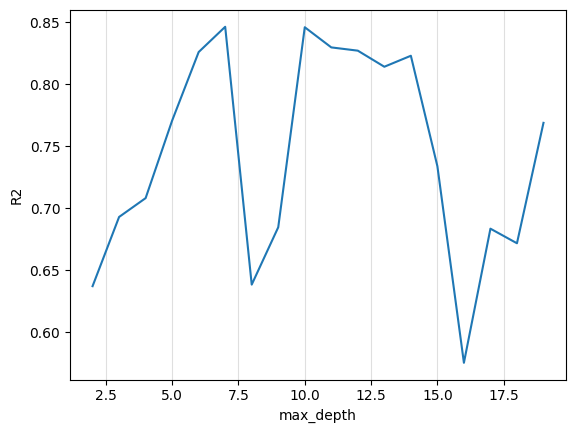

In [29]:
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

ax1.plot(max_depth_range, r2);
plt.xlabel('max_depth');
plt.ylabel('R2');
ax1.grid(axis='x', alpha = 0.4);

In [20]:
# Obtaining the maximum R2 value and its corresponding depth.
valor_max = max(r2)
indice_valor_max = r2.index(valor_max)
mejor_max_depth = max_depth_range[indice_valor_max]
print(mejor_max_depth)
print(valor_max)

7
0.8463768203632204


### * The optimal max_depth for the regression tree is 7.

In [30]:
dec_7_tree = DecisionTreeRegressor(max_depth=7, random_state=42)
dec_7_tree.fit(X_train, y_train)
train_7_score = dec_7_tree.score(X_train, y_train)
test_7_score = dec_7_tree.score(X_test, y_test)
print('The R2 score for the training data is:', train_7_score)
print('The R2 score for the test data is:', test_7_score)

The R2 score for the training data is: 0.958516936961625
The R2 score for the test data is: 0.8463768203632204
